# Looking at BrainSpace

JG's initial playing around with the toolbox...

## Setup

Define some variables

In [1]:
bs_dir = '../../../../libraries_of_others/github/BrainSpace'
surf_dir = bs_dir + '/shared/surfaces'

Importage

In [14]:
# Generic imports
import os,sys,glob,numpy as np,pandas as pd

# Viz stuff
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# Brainspace stuff
sys.path.append(bs_dir)
import brainspace
from brainspace.datasets import load_conte69
from brainspace.plotting import plot_hemispheres,plot_surf
from brainspace.datasets import load_group_fc, load_parcellation
from brainspace.gradient import GradientMaps

# Nipy stuff
from nilearn.plotting import plot_surf,plot_surf_stat_map,view_surf
import nibabel as nib

In [15]:
from brainspace.utils.parcellation import map_to_labels

In [18]:
labeling = load_parcellation('schaefer', scale=400, join=True)

## Alternative plotting

The brainspace plotting routine looks very nice, but relies on a vtk installation that looks nontrivial (and in any case didn't work when I tried it). 

So, let's figure out how to swap in nilearn

Unfortunately it appears a bit convoluted

The surf objects are complicated looking 

In [3]:
# Load left and right hemispheres
surf_lh, surf_rh = load_conte69()

/nethome/kcni/jgriffiths/Software/miniconda3/envs/jupyter_py3/lib/python3.7/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


In [171]:
surf_lh

In [177]:
surf_lh.GetVerts()

VTKArray([], dtype=int64)

cutting to the chase: brainspace's default stuff with the conte surfaces uses data in the brainspace folder 

In [181]:
glob.glob(surf_dir + '/*')

['/nethome/kcni/jgriffiths/Code/libraries_of_others/github/BrainSpace/shared/surfaces/conte69_32k_rh_mask.csv',
 '/nethome/kcni/jgriffiths/Code/libraries_of_others/github/BrainSpace/shared/surfaces/conte69_32k_temporal_mask.csv',
 '/nethome/kcni/jgriffiths/Code/libraries_of_others/github/BrainSpace/shared/surfaces/conte69_5k_midline_mask.csv',
 '/nethome/kcni/jgriffiths/Code/libraries_of_others/github/BrainSpace/shared/surfaces/conte69_32k_left_hemisphere.gii',
 '/nethome/kcni/jgriffiths/Code/libraries_of_others/github/BrainSpace/shared/surfaces/conte69_5k_right_hemisphere.gii',
 '/nethome/kcni/jgriffiths/Code/libraries_of_others/github/BrainSpace/shared/surfaces/conte69_32k_rh_midline_mask.csv',
 '/nethome/kcni/jgriffiths/Code/libraries_of_others/github/BrainSpace/shared/surfaces/conte69_32k_right_hemisphere.gii',
 '/nethome/kcni/jgriffiths/Code/libraries_of_others/github/BrainSpace/shared/surfaces/conte69_32k_right_sphere.gii',
 '/nethome/kcni/jgriffiths/Code/libraries_of_others/gith

The gifti files are what we need 

In [4]:
# Calling it 'lhp' because I think this is a pial surface. 
# It might be midthickness though...
lhp_file = surf_dir + '/conte69_32k_left_hemisphere.gii'

In [5]:
lhp_img = nib.load(lhp_file)

In [6]:
lhp_vtx = lhp_img.darrays[0].data[:]
lhp_tri = lhp_img.darrays[1].data[:]

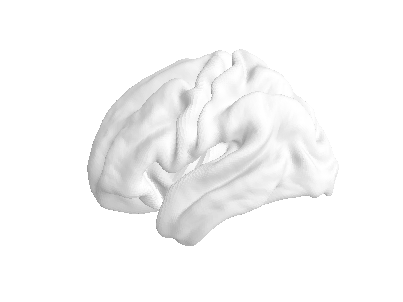

In [187]:
disp = plot_surf([lhp_vtx,lhp_tri]);

## From examples

This is from the example in the brainspace docs

In [189]:
# Load left and right hemispheres
surf_lh, surf_rh = load_conte69()
surf_lh.n_points

/nethome/kcni/jgriffiths/Software/miniconda3/envs/jupyter_py3/lib/python3.7/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


32492

In [190]:
surf_rh.n_points

32492

Parcellation

In [20]:
sch400_parc = load_parcellation('schaefer', scale=400, join=True)

Functional connectivity matrix

In [21]:
sch400_fc = load_group_fc('schaefer', scale=400)
sch400_fc.shape



(400, 400)

Let's take a look:


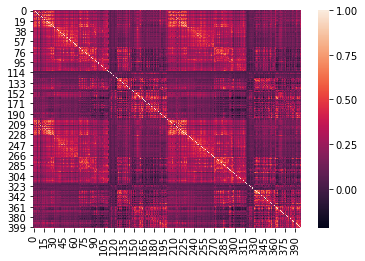

In [197]:
sns.heatmap(sch400_fc)

Compute gradients for this matrix

In [22]:
sch400_fc_gm = GradientMaps(n_components=2, approach='dm', kernel='normalized_angle')
sch400_fc_gm.fit(sch400_fc)

GradientMaps(alignment=None, approach='dm', kernel='normalized_angle',
             n_components=2, random_state=None)

In [199]:
sch400_fc_gm_surf = map_to_labels(sch400_fc_gm.gradients_[:, 0], 
                                  sch400_parc, mask=sch400_parc != 0,
                      fill=np.nan)

And plot the principal gradient

/nethome/kcni/jgriffiths/Software/miniconda3/envs/jupyter_py3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


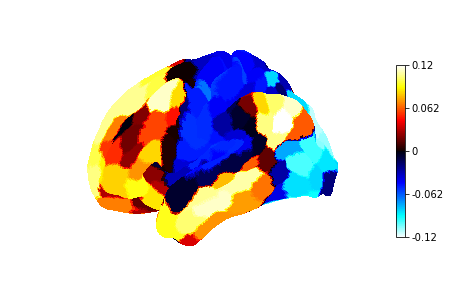

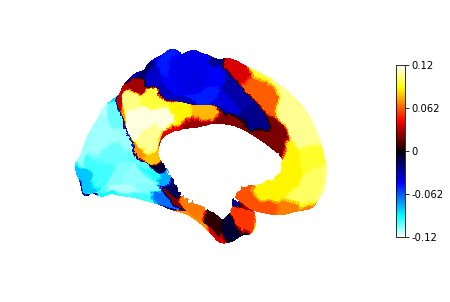

In [204]:
disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_gm_surf[:32492],view='lateral',hemi='left');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_gm_surf[:32492],view='medial',hemi='left');

## Alternative params: no kernel, PCA embedding

In [205]:
sch400_fc_gm_pca = GradientMaps(n_components=2, approach='pca', kernel=None)
sch400_fc_gm_pca.fit(sch400_fc)

sch400_fc_gm_pca_surf_pc1 = map_to_labels(sch400_fc_gm_pca.gradients_[:, 0], 
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan)

sch400_fc_gm_pca_surf_pc2 = map_to_labels(sch400_fc_gm_pca.gradients_[:, 1], 
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan)

/nethome/kcni/jgriffiths/Software/miniconda3/envs/jupyter_py3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


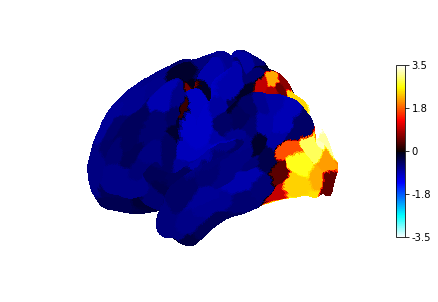

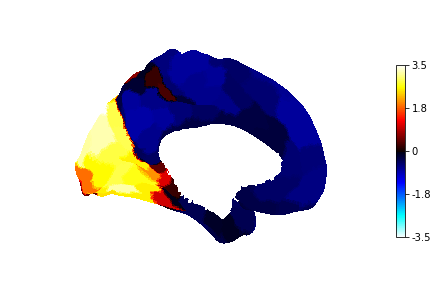

In [206]:
disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_gm_pca_surf_pc1[:32492],view='lateral',hemi='left');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_gm_pca_surf_pc1[:32492],view='medial',hemi='left');

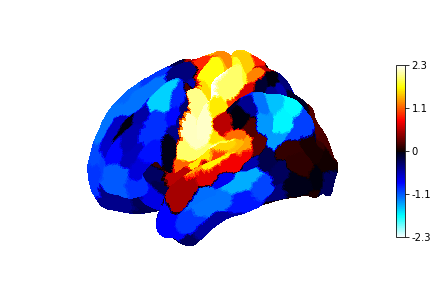

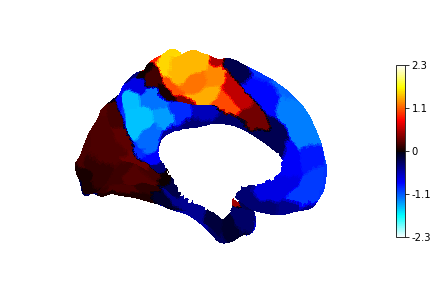

In [208]:
disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_gm_pca_surf_pc2[:32492],view='lateral',hemi='left');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_gm_pca_surf_pc2[:32492],view='medial',hemi='left');

## Just the eigenvectors?

In [ ]:
sch400_fc_abs_evals,sch400_fc_abs_evecs = np.linalg.eig(np.abs(sch400_fc))

sch400_fc_abs_evecs_surf_pc1 = map_to_labels(sch400_fc_abs_evecs[:, 0], 
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan);

sch400_fc_abs_evecs_surf_pc2 = map_to_labels(sch400_fc_abs_evecs[:, 1], 
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan);

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_abs_evecs_surf_pc1[:32492],
                          view='medial',hemi='left');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_abs_evecs_surf_pc1[:32492],
                          view='lateral',hemi='left');

In [210]:
sch400_fc_evals,sch400_fc_evecs = np.linalg.eig(sch400_fc)

sch400_fc_evecs_surf_pc1 = map_to_labels(sch400_fc_evecs[:, 0], 
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan)

sch400_fc_evecs_surf_pc2 = map_to_labels(sch400_fc_evecs[:, 1], 
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan)

In [216]:
sch400_fc_evecs_surf_pc3 = map_to_labels(sch400_fc_evecs[:, 2], 
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan)

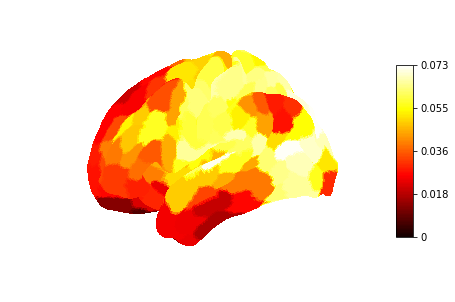

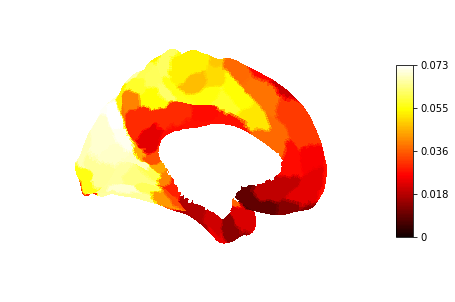

In [212]:
disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_evecs_surf_pc1[:32492],view='lateral',hemi='left');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_evecs_surf_pc1[:32492],view='medial',hemi='left');

/nethome/kcni/jgriffiths/Software/miniconda3/envs/jupyter_py3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


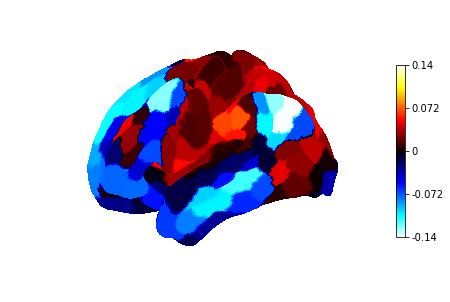

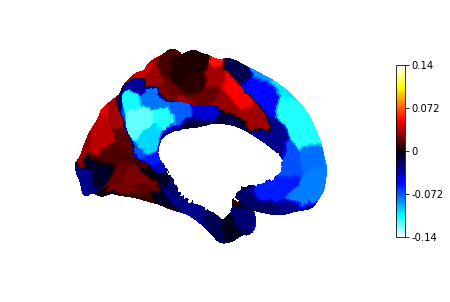

In [211]:
disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_evecs_surf_pc2[:32492],view='lateral',hemi='left');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_evecs_surf_pc2[:32492],view='medial',hemi='left');

/nethome/kcni/jgriffiths/Software/miniconda3/envs/jupyter_py3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


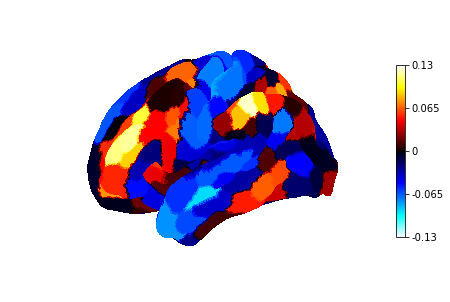

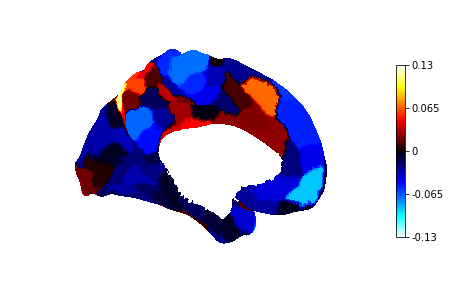

In [217]:
disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_evecs_surf_pc3[:32492],view='lateral',hemi='left');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_evecs_surf_pc3[:32492],view='medial',hemi='left');

## Graveyard

### Unihemispheric connectivity decomposition

signed values

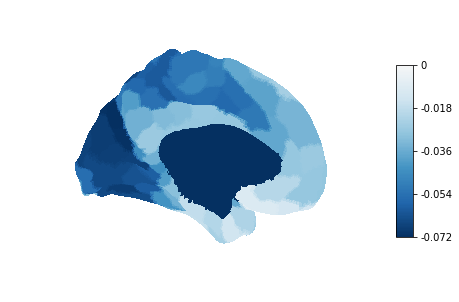

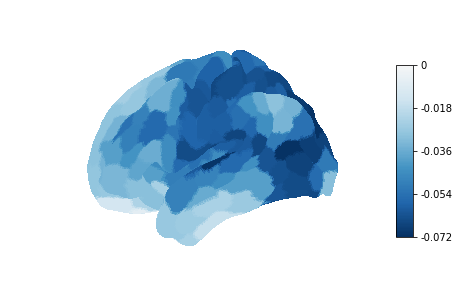

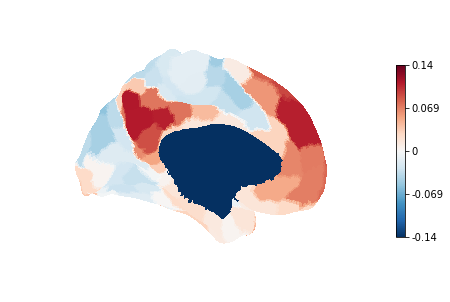

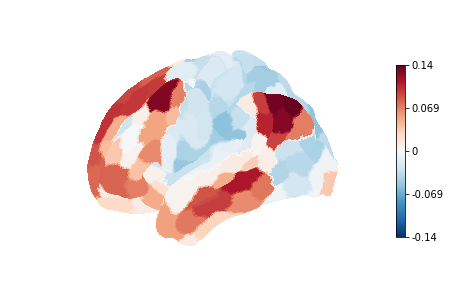

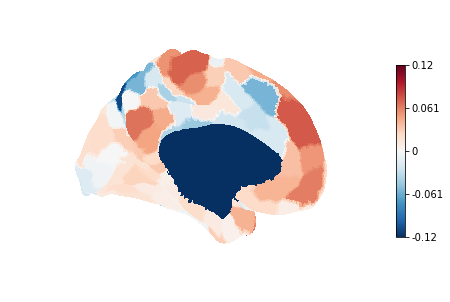

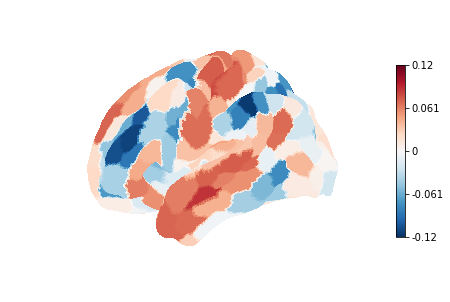

In [35]:
sch400_fc_evals,sch400_fc_abs_evecs = np.linalg.eig(sch400_fc)

sch400_fc_evecs_surf_pc1 = map_to_labels(sch400_fc_evecs[:, 0], 
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan);

sch400_fc_evecs_surf_pc2 = map_to_labels(sch400_fc_evecs[:, 1], 
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan);

sch400_fc_evecs_surf_pc3 = map_to_labels(sch400_fc_evecs[:, 2], 
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan);


disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_evecs_surf_pc1[:32492],
                          view='medial',hemi='left',cmap='RdBu_r');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_evecs_surf_pc1[:32492],
                          view='lateral',hemi='left',cmap='RdBu_r');


disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_evecs_surf_pc2[:32492],
                          view='medial',hemi='left',cmap='RdBu_r');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_evecs_surf_pc2[:32492],
                          view='lateral',hemi='left',cmap='RdBu_r');


disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_evecs_surf_pc3[:32492],
                          view='medial',hemi='left',cmap='RdBu_r');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_evecs_surf_pc3[:32492],
                          view='lateral',hemi='left',cmap='RdBu_r');

with absolute values...

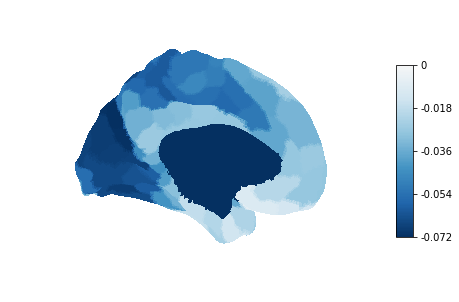

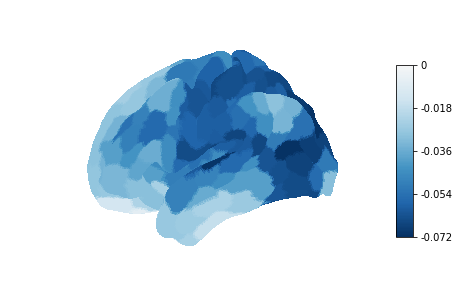

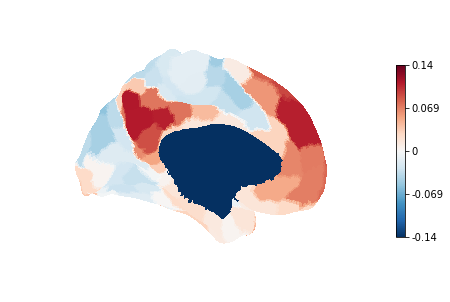

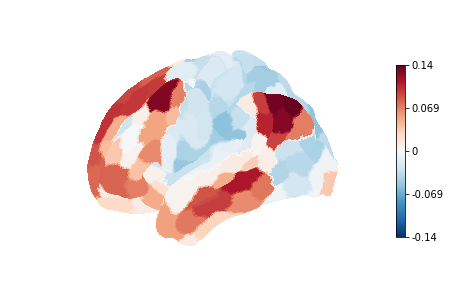

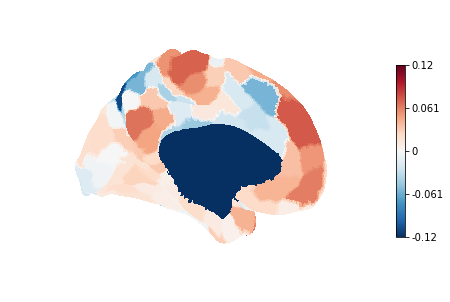

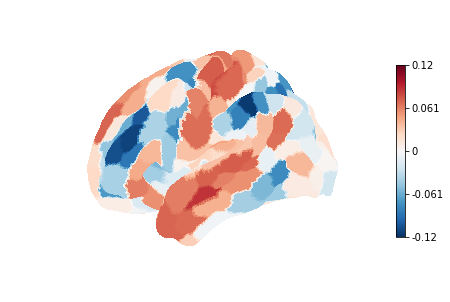

In [34]:
sch400_fc_abs_evals,sch400_fc_abs_evecs = np.linalg.eig(np.abs(sch400_fc))

sch400_fc_abs_evecs_surf_pc1 = map_to_labels(sch400_fc_abs_evecs[:, 0], 
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan);

sch400_fc_abs_evecs_surf_pc2 = map_to_labels(sch400_fc_abs_evecs[:, 1], 
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan);

sch400_fc_abs_evecs_surf_pc3 = map_to_labels(sch400_fc_abs_evecs[:, 2], 
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan);


disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_abs_evecs_surf_pc1[:32492],
                          view='medial',hemi='left',cmap='RdBu_r');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_abs_evecs_surf_pc1[:32492],
                          view='lateral',hemi='left',cmap='RdBu_r');


disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_abs_evecs_surf_pc2[:32492],
                          view='medial',hemi='left',cmap='RdBu_r');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_abs_evecs_surf_pc2[:32492],
                          view='lateral',hemi='left',cmap='RdBu_r');


disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_abs_evecs_surf_pc3[:32492],
                          view='medial',hemi='left',cmap='RdBu_r');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_abs_evecs_surf_pc3[:32492],
                          view='lateral',hemi='left',cmap='RdBu_r');

Graph laplacian

In [44]:
L = sch400_fc - sch400_fc.sum(axis=1)
L

array([[ -73.579471  ,  -62.6005414 , -109.295815  , ...,  -51.6240432 ,
         -62.92888147,  -92.611426  ],
       [ -74.295741  ,  -61.8842714 , -109.490515  , ...,  -51.6198612 ,
         -62.89234147,  -92.560316  ],
       [ -74.162811  ,  -62.6623114 , -108.712475  , ...,  -51.5703942 ,
         -62.89505147,  -92.540106  ],
       ...,
       [ -74.52296   ,  -62.8235784 , -109.602315  , ...,  -50.6805542 ,
         -62.71774147,  -92.575836  ],
       [ -74.472591  ,  -62.7408514 , -109.571765  , ...,  -51.3625342 ,
         -62.03576147,  -92.388426  ],
       [ -74.383971  ,  -62.6376614 , -109.445655  , ...,  -51.4494642 ,
         -62.61726147,  -91.806926  ]])

In [126]:
A = sch400_fc.copy()
D = np.diag(sch400_fc.sum(axis=1))
#L = D - A
L = D - A

In [125]:
np.round(L.sum(axis=1),10)

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0.,  0., -0.,  0.,
        0.,  0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,  0., -0., -0.,
        0., -0.,  0., -0., -0., -0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
        0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
        0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
        0., -0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
        0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,
        0., -0.,  0., -0.,  0.,  0.,  0.,  0., -0., -0., -0., -0.,  0.,
       -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,
        0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.,
        0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0.,
       -0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,
        0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -0., -0., -0., -0.,  0.,  0., -0., -0., -0.,  0

In [128]:
L_evals,L_evecs = np.linalg.eig(L)

In [ ]:
sch400_fcL_evecs_surf_pc1 = map_to_labels(L_evecs[:,0],
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan);

sch400_fcL_evecs_surf_pc2 = map_to_labels(L_evecs[:,1],
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan);

sch400_fcL_evecs_surf_pc3 = map_to_labels(L_evecs[:,2],
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan);


disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fcL_evecs_surf_pc1[:32492],
                          view='medial',hemi='left',cmap='RdBu_r');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fcL_evecs_surf_pc1[:32492],
                          view='lateral',hemi='left',cmap='RdBu_r');


disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fcL_evecs_surf_pc2[:32492],
                          view='medial',hemi='left',cmap='RdBu_r');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fcL_evecs_surf_pc2[:32492],
                          view='lateral',hemi='left',cmap='RdBu_r');

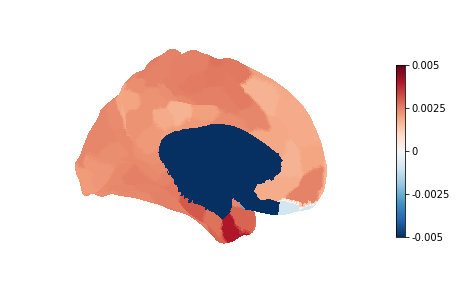

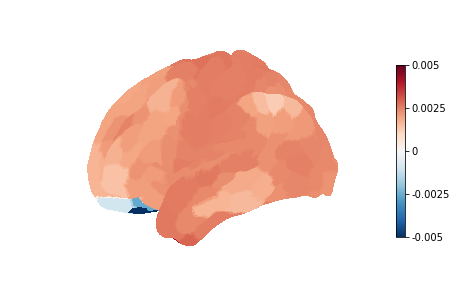

In [139]:
disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fcL_evecs_surf_pc2[:32492],
                          view='medial',hemi='left',cmap='RdBu_r',vmax=0.005)

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fcL_evecs_surf_pc2[:32492],
                          view='lateral',hemi='left',cmap='RdBu_r',vmax=0.005)

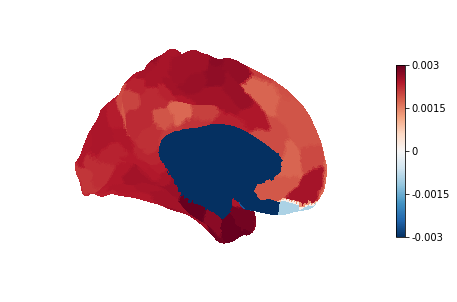

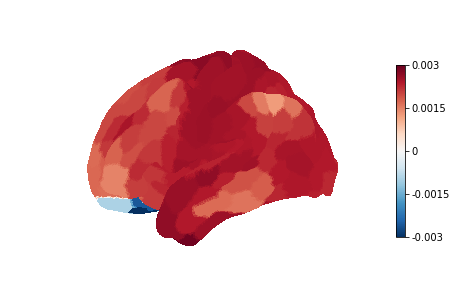

In [143]:
disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fcL_evecs_surf_pc2[:32492],
                          view='medial',hemi='left',cmap='RdBu_r',vmax=0.003)

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fcL_evecs_surf_pc2[:32492],
                          view='lateral',hemi='left',cmap='RdBu_r',vmax=0.003)

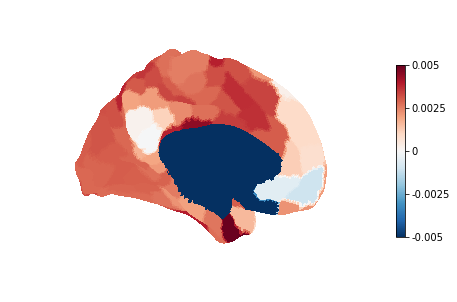

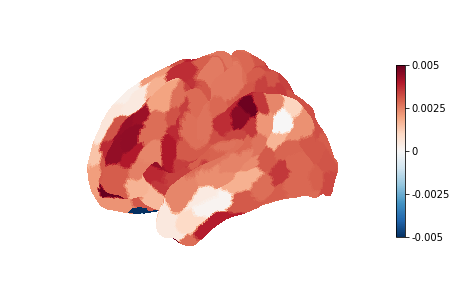

In [138]:
disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fcL_evecs_surf_pc3[:32492],
                          view='medial',hemi='left',cmap='RdBu_r',vmax=0.005)

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fcL_evecs_surf_pc3[:32492],
                          view='lateral',hemi='left',cmap='RdBu_r',vmax=0.005)

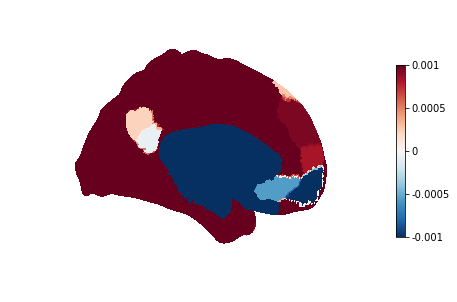

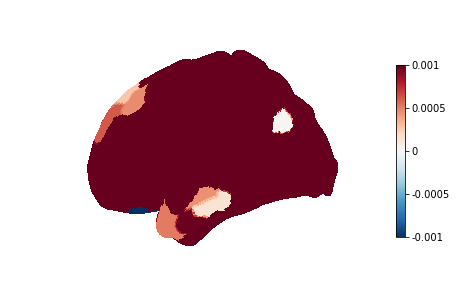

In [134]:
disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fcL_evecs_surf_pc3[:32492],vmax=0.001,
                          view='medial',hemi='left',cmap='RdBu_r');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fcL_evecs_surf_pc3[:32492],vmax=0.001,
                          view='lateral',hemi='left',cmap='RdBu_r');


In [ ]:
disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fcL_evecs_surf_pc3[:32492],vmax=0.01,
                          view='medial',hemi='left',cmap='RdBu_r');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fcL_evecs_surf_pc3[:32492],vmax=0.01,
                          view='lateral',hemi='left',cmap='RdBu_r');


In [ ]:
sch400_fc_abs_evals,sch400_fc_abs_evecs = np.linalg.eig(np.abs(sch400_fc))

sch400_fc_abs_evecs_surf_pc1 = map_to_labels(sch400_fc_abs_evecs[:, 0], 
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan);

sch400_fc_abs_evecs_surf_pc2 = map_to_labels(sch400_fc_abs_evecs[:, 1], 
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan);

sch400_fc_abs_evecs_surf_pc3 = map_to_labels(sch400_fc_abs_evecs[:, 2], 
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan);


disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_abs_evecs_surf_pc1[:32492],
                          view='medial',hemi='left',cmap='RdBu_r');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_abs_evecs_surf_pc1[:32492],
                          view='lateral',hemi='left',cmap='RdBu_r');


disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_abs_evecs_surf_pc2[:32492],
                          view='medial',hemi='left',cmap='RdBu_r');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_abs_evecs_surf_pc2[:32492],
                          view='lateral',hemi='left',cmap='RdBu_r');


disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_abs_evecs_surf_pc3[:32492],
                          view='medial',hemi='left',cmap='RdBu_r');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_abs_evecs_surf_pc3[:32492],
                          view='lateral',hemi='left',cmap='RdBu_r');

In [24]:
sch400_fc_lh = sch400_fc[:200,:][:,:200].copy()
sch400_fc_lh_evals,sch400_fc_lh_evecs = np.linalg.eig(sch400_fc_lh)

In [23]:
sch400_fc_lh_evecs_surf_pc1 = map_to_labels(sch400_fc_lh_evecs[:, 0], 
                                  sch400_parc, mask=sch400_parc != 0,fill=np.nan)

IndexError: index 394 is out of bounds for axis 0 with size 200

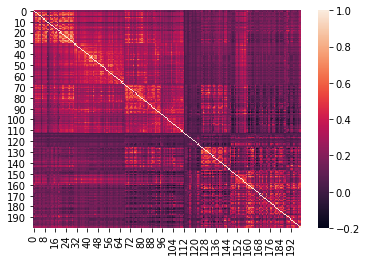

In [215]:
sns.heatmap(sch400_fc_lh);

In [16]:
tmparr = np.zeros_like(sch400_fc_lh)
tmparr[:,:5] = sch400_fc_lh_evecs[:,:5]
#tmparr_surf = sch400_fc_gm_pca_surf_pc1#[:32492]
tmparr_surf = map_to_labels(tmparr[:,0], labeling, mask=labeling != 0,
                      fill=np.nan)



NameError: name 'labeling' is not defined

In [ ]:
disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_evecs_surf_pc3[:32492],view='lateral',hemi='left');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_evecs_surf_pc3[:32492],view='medial',hemi='left');

In [ ]:
sch400_fc_lh_ev1 = plot_surf_stat_map([lhp_vtx,lhp_tri], )

In [ ]:
disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_evecs_surf_pc3[:32492],view='lateral',hemi='left');

disp = plot_surf_stat_map([lhp_vtx,lhp_tri],
                          sch400_fc_evecs_surf_pc3[:32492],view='medial',hemi='left');

In [241]:
tmparr_surf = sch400_fc_gm_pca_surf_pc1#[:32492]

NameError: name 'sch400_fc_gm_pca_surf_pc1' is not defined

In [ ]:
sch400_fc_gm_pca_surf_pc1[:32492],view='lateral',hemi='left');


In [ ]:
#plot_hemispheres(surf_lh, surf_rh, size=(800, 200))

In [94]:
m.shape

(400, 400)

In [35]:
#GradientMaps(alignment=None, approach='dm', kernel='normalized_angle',
#             n_components=2, random_state=None)

In [36]:
gm.gradients_.shape

(400, 2)

In [98]:
grad

array([ 0.12076662, -0.05867128, -0.06574314, ...,  0.06342197,
        0.06342197,  0.06342197])

In [97]:
labeling

array([196,  67,  47, ..., 339, 339, 339])

In [37]:
grad = map_to_labels(gm.gradients_[:, 0], labeling, mask=labeling != 0,
                      fill=np.nan)

In [15]:
#>>> # Plot first gradient on the cortical surface.
#plot_hemispheres(surf_lh, surf_rh, array_name=grad, size=(800, 200))

In [153]:
gm2 = GradientMaps(n_components=2, approach='pca', kernel=None)
gm2.fit(m)

GradientMaps(alignment=None, approach='pca', kernel=None, n_components=2,
             random_state=None)

In [154]:
grad2 = map_to_labels(gm2.gradients_[:, 0], labeling, mask=labeling != 0,
                      fill=np.nan)

/nethome/kcni/jgriffiths/Software/miniconda3/envs/jupyter_py3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


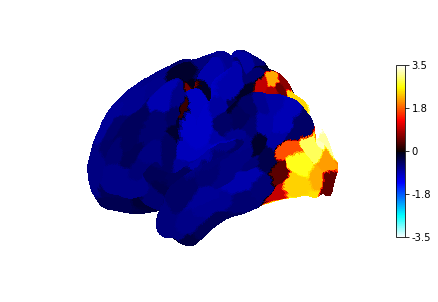

In [155]:
disp = plot_surf_stat_map([vtx,tri],grad2[:32492],view='lateral',hemi='left');

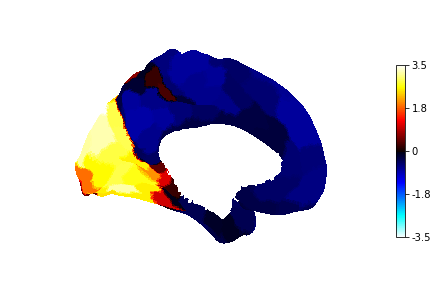

In [156]:
disp = plot_surf_stat_map([vtx,tri],grad2[:32492],view='medial',hemi='left');

In [157]:
gm2b = GradientMaps(n_components=2, approach='pca', kernel=None)
gm2b.fit(m)

GradientMaps(alignment=None, approach='pca', kernel=None, n_components=2,
             random_state=None)

In [165]:
grad2b = map_to_labels(gm2b.gradients_[:, 1], labeling, mask=labeling != 0,
                      fill=np.nan)

/nethome/kcni/jgriffiths/Software/miniconda3/envs/jupyter_py3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


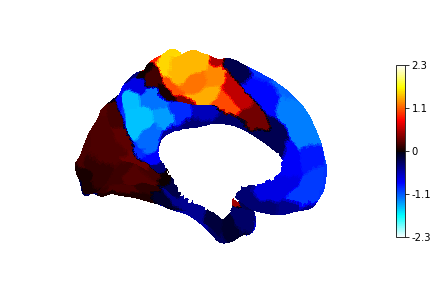

In [166]:
disp = plot_surf_stat_map([vtx,tri],grad2b[:32492],view='medial',hemi='left');

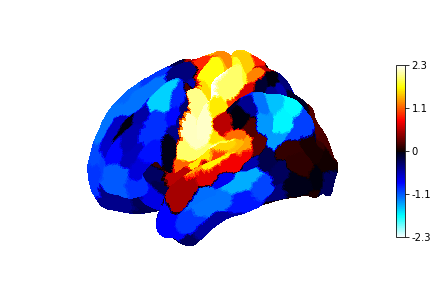

In [167]:
disp = plot_surf_stat_map([vtx,tri],grad2b[:32492],view='lateral',hemi='left');

In [112]:
gm3 = GradientMaps(n_components=2, approach='pca', kernel=None)
gm3.fit(m_lh)

GradientMaps(alignment=None, approach='pca', kernel=None, n_components=2,
             random_state=None)

In [114]:
gm3.gradients_.shape

(200, 2)

In [115]:
tmparr = np.zeros_like(gm2.gradients_)

In [117]:
tmparr[:200,:] = gm3.gradients_

In [118]:
grad3 = map_to_labels(tmparr[:,0], labeling, mask=labeling != 0,
                      fill=np.nan)

/nethome/kcni/jgriffiths/Software/miniconda3/envs/jupyter_py3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


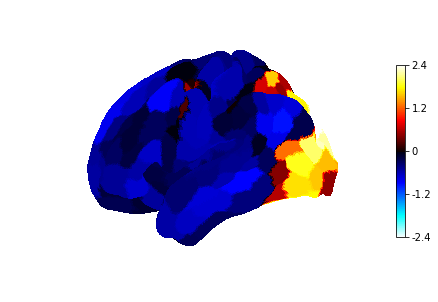

In [119]:
disp = plot_surf_stat_map([vtx,tri],grad3[:32492],view='lateral',hemi='left');

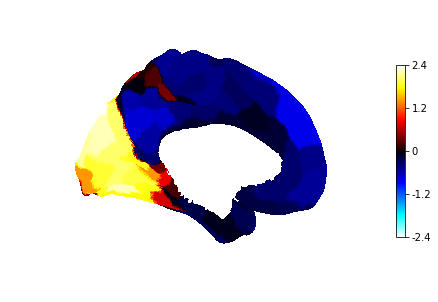

In [120]:
disp = plot_surf_stat_map([vtx,tri],grad3[:32492],view='medial',hemi='left');

In [121]:
grad3b = map_to_labels(tmparr[:,1], labeling, mask=labeling != 0,
                      fill=np.nan)

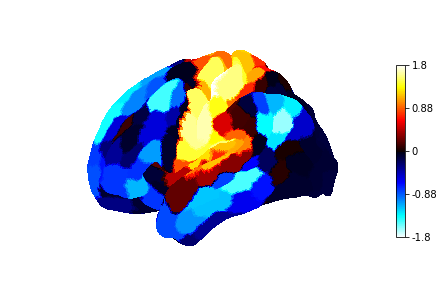

In [123]:
disp = plot_surf_stat_map([vtx,tri],grad3b[:32492],view='lateral',hemi='left');

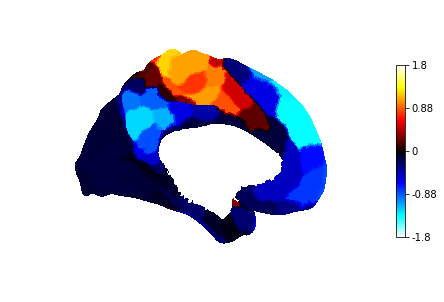

In [122]:
disp = plot_surf_stat_map([vtx,tri],grad3b[:32492],view='medial',hemi='left');

In [129]:
np.linalg.eig(m)[0][:5]

array([90.73885643, 26.89957962, 19.90306108, 12.56195408, 10.48026909])

In [131]:
np.linalg.eig(m)[1][:3,:3]

array([[ 0.0431259 , -0.0045915 , -0.01007245],
       [ 0.03468474, -0.02811842, -0.00365705],
       [ 0.06523846,  0.01063166, -0.02168068]])

In [128]:
np.linalg.eig(m.dot(m))[0][:5]

array([8233.54006698,  723.58738381,  396.13184023,  157.80269043,
        109.83604023])

In [136]:
np.linalg.eig(m.dot(m))[1][:3,:3]

array([[-0.0431259 , -0.0045915 ,  0.01007245],
       [-0.03468474, -0.02811842,  0.00365705],
       [-0.06523846,  0.01063166,  0.02168068]])

In [137]:
gm4 = GradientMaps(n_components=2, approach='pca', kernel=None)
gm4.fit(m.dot(m))

GradientMaps(alignment=None, approach='pca', kernel=None, n_components=2,
             random_state=None)

In [138]:
grad4 = map_to_labels(gm4.gradients_[:,0], labeling, mask=labeling != 0,
                      fill=np.nan)

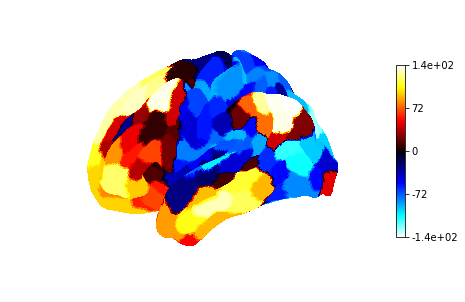

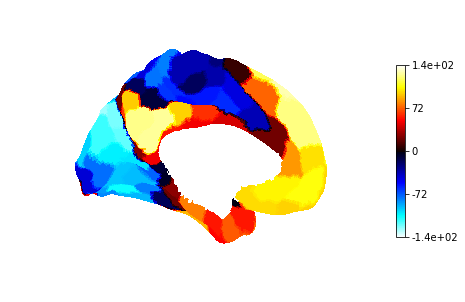

In [146]:
disp = plot_surf_stat_map([vtx,tri],grad4[:32492],view='lateral',hemi='left');

disp = plot_surf_stat_map([vtx,tri],grad4[:32492],view='medial',hemi='left');

In [149]:
m_evals,m_evecs = np.linalg.eig(m)
grad_m_evec = map_to_labels(m_evecs[:,1], labeling, mask=labeling != 0,
                      fill=np.nan)

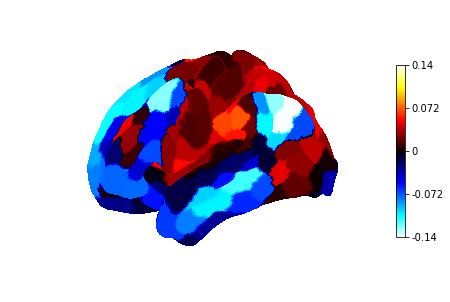

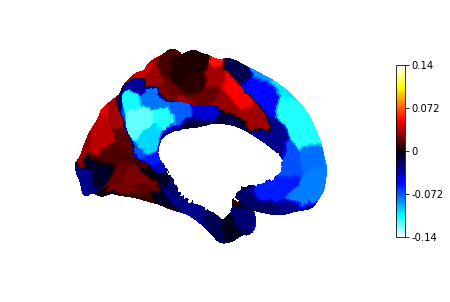

In [150]:
disp = plot_surf_stat_map([vtx,tri],grad_m_evec[:32492],view='lateral',hemi='left');

disp = plot_surf_stat_map([vtx,tri],grad_m_evec[:32492],view='medial',hemi='left');

In [151]:
mm_evals,mm_evecs = np.linalg.eig(m.dot(m))
grad_mm_evec = map_to_labels(mm_evecs[:,1], labeling, mask=labeling != 0,
                      fill=np.nan)

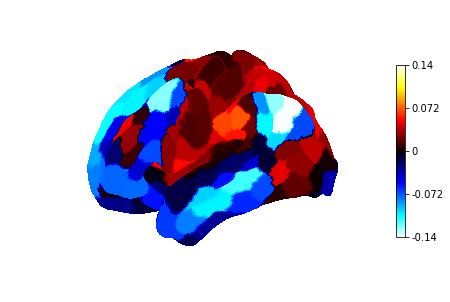

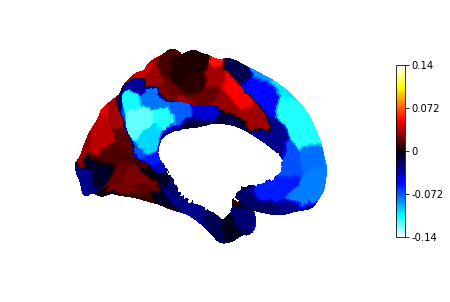

In [152]:
disp = plot_surf_stat_map([vtx,tri],grad_mm_evec[:32492],view='lateral',hemi='left');

disp = plot_surf_stat_map([vtx,tri],grad_mm_evec[:32492],view='medial',hemi='left');

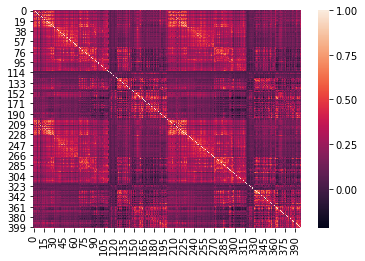

In [162]:
sns.heatmap(m)

In [163]:
labeling

array([196,  67,  47, ..., 339, 339, 339])

In [164]:
from brainspace.datasets.parcellations import schaefer_400_conte69

ImportError: cannot import name 'schaefer_400_conte69' from 'brainspace.datasets.parcellations' (unknown location)

In [ ]:
scha